In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("fake_customer_data_with_errors.csv")

In [58]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,NaN,NaN
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0,NaN,Female
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0,NaN,male
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0,NaN,F
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,NaN,M


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2150 entries, 0 to 2149
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2150 non-null   object 
 1   Name             2150 non-null   object 
 2   Age              1630 non-null   float64
 3   Gender           1877 non-null   object 
 4   Email            2150 non-null   object 
 5   Phone            1072 non-null   float64
 6   PurchaseAmount   2049 non-null   float64
 7   PurchaseDate     2150 non-null   object 
 8   ProductCategory  1573 non-null   object 
 9   Rating           1821 non-null   float64
 10  Unnamed          0 non-null      float64
 11    Gender         1877 non-null   object 
dtypes: float64(5), object(7)
memory usage: 201.7+ KB


In [60]:
df.describe()

,Age,Phone,PurchaseAmount,Rating,Unnamed
count,1630.000000,1.072000e+03,2049.000000,1821.000000,0.0
mean,85.180982,5.668417e+08,509.418882,4.183416,NaN
std,86.794111,4.321530e+08,288.257697,2.871300,NaN
min,-1.000000,1.234568e+08,5.060000,1.000000,NaN
25%,-1.000000,1.234568e+08,263.680000,2.000000,NaN
50%,54.000000,9.876543e+08,519.250000,3.000000,NaN
75%,200.000000,9.876543e+08,762.910000,5.000000,NaN
max,200.000000,9.876543e+08,999.560000,10.000000,NaN


In [61]:
df.shape

(2150, 12)

In [62]:
df.duplicated().sum()

50

In [63]:
df.nunique()

CustomerID         2100
Name                 48
Age                  78
Gender                6
Email               144
Phone                 2
PurchaseAmount     1991
PurchaseDate        860
ProductCategory       5
Rating                6
Unnamed               0
  Gender              6
dtype: int64

In [64]:
df.isna()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Unnamed,Gender
0,False,False,False,True,False,False,False,False,False,False,True,True
1,False,False,True,False,False,True,False,False,True,False,True,False
2,False,False,False,False,False,True,False,False,False,False,True,False
3,False,False,False,False,False,True,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,False,False,False,False,False,False,False,False,False,False,True,False
2146,False,False,True,False,False,True,False,False,False,False,True,False
2147,False,False,False,False,False,True,False,False,False,True,True,False
2148,False,False,False,False,False,False,False,False,True,False,True,False


In [65]:
df.isna().sum()

CustomerID            0
Name                  0
Age                 520
Gender              273
Email                 0
Phone              1078
PurchaseAmount      101
PurchaseDate          0
ProductCategory     577
Rating              329
Unnamed            2150
  Gender            273
dtype: int64

In [66]:
df = df.drop(columns = ["Unnamed", "  Gender  "])

In [67]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
0,CUST1000,Ali Hassan,72.0,NaN,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0
1,CUST1001,Fatma Ali,NaN,Female,fatma.ali@hotmail.com,NaN,900.25,2023-02-23,NaN,3.0
2,CUST1002,Ahmed Mahmoud,-1.0,male,ahmed.mahmoud@hotmail.com,NaN,761.72,2023-07-07,Toys,2.0
3,CUST1003,Ahmed Gaber,-1.0,F,ahmed.gaber@gmail.com,NaN,303.72,2023-12-30,NaN,2.0
4,CUST1004,Ali Ibrahim,73.0,M,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0


In [68]:
df = df.drop_duplicates()

In [69]:
df.shape

(2100, 10)

In [70]:
df['Gender'].unique()

array([nan, 'Female', 'male', 'F', 'M', 'female', 'Male'], dtype=object)

In [71]:
df["Gender"] = df["Gender"].str.lower()

In [72]:
df["Gender"].unique()

array([nan, 'female', 'male', 'f', 'm'], dtype=object)

In [73]:
df["Gender"] = df["Gender"].replace({"m":"male", "f":"female"})

In [74]:
df["Gender"].unique()

array([nan, 'female', 'male'], dtype=object)

In [75]:
df.isna().sum()

CustomerID            0
Name                  0
Age                 506
Gender              267
Email                 0
Phone              1057
PurchaseAmount       97
PurchaseDate          0
ProductCategory     565
Rating              322
dtype: int64

In [76]:
df["Gender"].fillna("male", inplace=True)

C:\Users\user6\AppData\Local\Temp\ipykernel_13700\3881864612.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna("male", inplace=True)


In [77]:
df.isna().sum()

CustomerID            0
Name                  0
Age                 506
Gender                0
Email                 0
Phone              1057
PurchaseAmount       97
PurchaseDate          0
ProductCategory     565
Rating              322
dtype: int64

In [78]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [79]:
df.isna().sum()

CustomerID            0
Name                  0
Age                   0
Gender                0
Email                 0
Phone              1057
PurchaseAmount       97
PurchaseDate          0
ProductCategory     565
Rating              322
dtype: int64

In [80]:
df["ProductCategory"] = df["ProductCategory"].fillna("Unknown")

In [81]:
df["PurchaseDate"]

0       2023-10-12
1       2023-02-23
2       2023-07-07
3       2023-12-30
4       2023-12-07
           ...    
2095    2025-06-06
2096    2023-08-06
2097    2023-11-02
2098    2023-03-24
2099    2023-01-18
Name: PurchaseDate, Length: 2100, dtype: object

In [82]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"],errors = 'coerce')

In [83]:
df["PurchaseDate"].unique()

<DatetimeArray>
['2023-10-12 00:00:00', '2023-02-23 00:00:00', '2023-07-07 00:00:00',
 '2023-12-30 00:00:00', '2023-12-07 00:00:00', '2025-01-16 00:00:00',
 '2024-06-12 00:00:00', '2024-05-17 00:00:00',                 'NaT',
 '2025-01-24 00:00:00',
 ...
 '2024-01-15 00:00:00', '2024-03-21 00:00:00', '2024-07-12 00:00:00',
 '2024-07-18 00:00:00', '2022-11-04 00:00:00', '2022-12-01 00:00:00',
 '2024-04-08 00:00:00', '2025-06-12 00:00:00', '2023-08-06 00:00:00',
 '2023-01-18 00:00:00']
Length: 860, dtype: datetime64[ns]

In [84]:
df["Age"].unique()

array([ 72.,  54.,  -1.,  73., 200.,  89.,  18.,  15.,  44.,  67.,  62.,
        90.,  70.,  46.,  57.,  81.,  29.,  83.,  41.,  31.,  40.,  79.,
        35.,  53.,  87.,  30.,  23.,  84.,  26.,  36.,  33.,  58.,  49.,
        28.,  65.,  71.,  56.,  76.,  25.,  43.,  21.,  63.,  66.,  77.,
        16.,  82.,  22.,  34.,  50.,  19.,  48.,  52.,  80.,  27.,  69.,
        60.,  88.,  78.,  85.,  64.,  45.,  38.,  74.,  39.,  32.,  37.,
        68.,  17.,  47.,  42.,  61.,  51.,  24.,  55.,  86.,  75.,  20.,
        59.])

In [85]:
df["Age"] = df["Age"].apply(lambda x:df["Age"].mean() if x<0 else x)

In [86]:
df.isna().sum()

CustomerID            0
Name                  0
Age                   0
Gender                0
Email                 0
Phone              1057
PurchaseAmount       97
PurchaseDate        118
ProductCategory       0
Rating              322
dtype: int64

In [87]:
df = df.dropna()

In [88]:
df.isna().sum()

CustomerID         0
Name               0
Age                0
Gender             0
Email              0
Phone              0
PurchaseAmount     0
PurchaseDate       0
ProductCategory    0
Rating             0
dtype: int64

In [89]:
df.sort_values(by=["PurchaseAmount","Rating"],ascending=False).head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating
687,CUST1687,Alaa Ibrahim,200.000000,female,alaa.ibrahim@yahoo.com,123456789.0,999.56,2025-05-16,Electronics,1.0
424,CUST1424,John Ali,80.000000,male,john.ali@gmail.com,987654321.0,999.23,2024-06-30,Toys,5.0
386,CUST1386,Fatma Ali,200.000000,female,fatma.ali@hotmail.com,123456789.0,995.55,2022-11-12,Clothing,4.0
335,CUST1335,Alaa Mahmoud,77.564286,female,alaa.mahmoud@yahoo.com,123456789.0,995.41,2024-02-11,Toys,3.0
1449,CUST2449,John Mahmoud,77.564286,female,john.mahmoud@yahoo.com,987654321.0,989.99,2024-11-28,Unknown,1.0


In [90]:
df["ProductCategory"].value_counts().sort_index()

ProductCategory
Books          130
Clothing       119
Electronics    130
Home           115
Toys           102
Unknown        215
Name: count, dtype: int64

In [91]:
gender_counts = df["Gender"].value_counts()
gender_counts

Gender
male      480
female    331
Name: count, dtype: int64

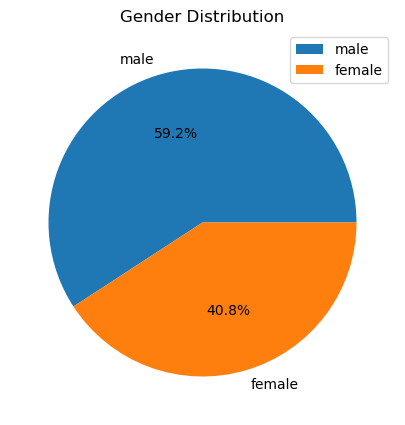

In [92]:
plt.figure(figsize=(10,5))
plt.pie(gender_counts,labels=gender_counts.index, autopct="%1.1f%%")
plt.title("Gender Distribution")
plt.legend()
plt.show()

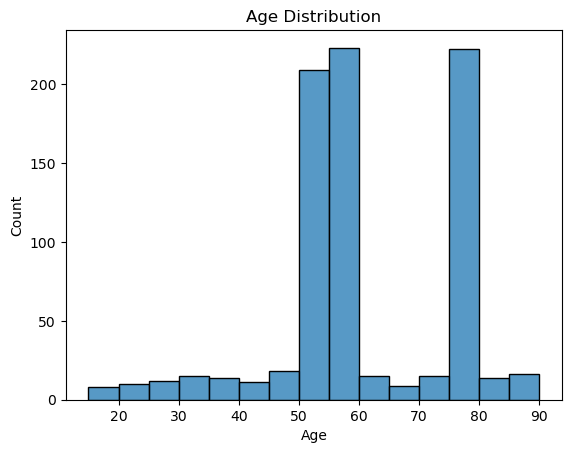

In [109]:
sns.histplot(df["Age"], bins=15)
plt.title("Age Distribution")
plt.show()

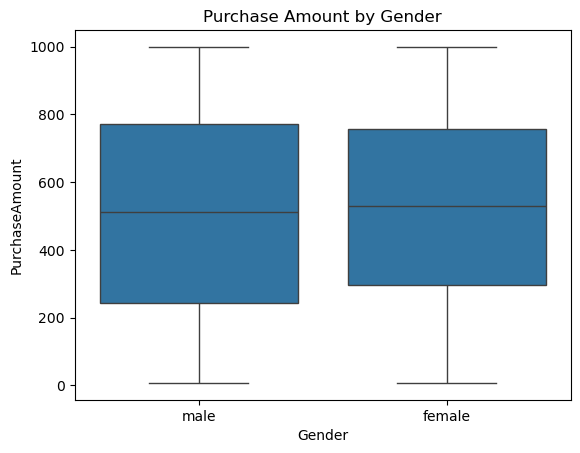

In [95]:
sns.boxplot(data=df, x="Gender", y="PurchaseAmount")
plt.title("Purchase Amount by Gender")
plt.show()

In [96]:
corr = df[["Age","Rating","PurchaseAmount"]].corr()
corr

,Age,Rating,PurchaseAmount
Age,1.000000,0.010755,-0.001171
Rating,0.010755,1.000000,-0.087796
PurchaseAmount,-0.001171,-0.087796,1.000000


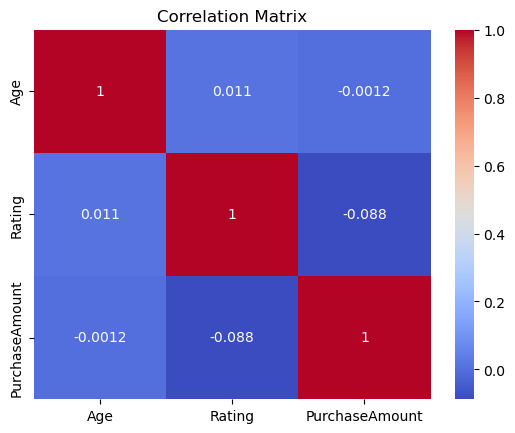

In [97]:
sns.heatmap(corr,annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

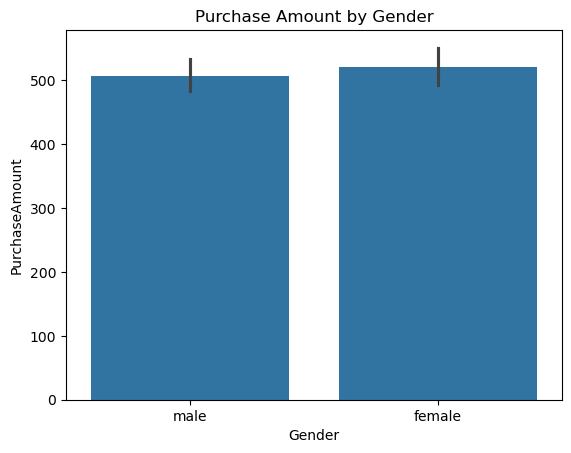

In [98]:
sns.barplot(data=df, x="Gender", y="PurchaseAmount", estimator="mean")
plt.title("Purchase Amount by Gender")
plt.show()

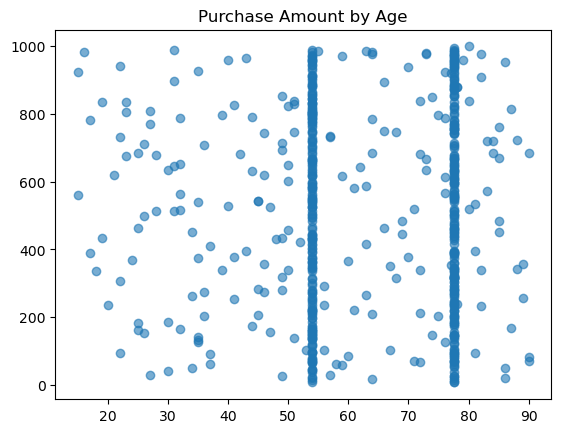

In [99]:
plt.scatter(data=df, x="Age", y="PurchaseAmount", alpha=0.6)
plt.title("Purchase Amount by Age")
plt.show()

In [100]:
df["PurchaseDate"] = pd.to_datetime(df["PurchaseDate"])

In [101]:
df["Month"] = df["PurchaseDate"].dt.month

In [102]:
df.head()

,CustomerID,Name,Age,Gender,Email,Phone,PurchaseAmount,PurchaseDate,ProductCategory,Rating,Month
0,CUST1000,Ali Hassan,72.000000,male,ali.hassan@gmail.com,123456789.0,837.31,2023-10-12,Books,3.0,10
4,CUST1004,Ali Ibrahim,73.000000,male,ali.ibrahim@yahoo.com,987654321.0,635.81,2023-12-07,Clothing,2.0,12
5,CUST1005,Alaa Ibrahim,54.000000,female,alaa.ibrahim@hotmail.com,987654321.0,886.26,2025-01-16,Unknown,2.0,1
7,CUST1007,Alaa Hassan,NaN,female,alaa.hassan@hotmail.com,987654321.0,318.43,2024-05-17,Toys,10.0,5
10,CUST1010,Ahmed Smith,77.564286,male,ahmed.smith@gmail.com,987654321.0,882.19,2025-06-24,Unknown,3.0,6


In [103]:
monthly_sales = df.groupby("Month")["PurchaseAmount"].sum()
monthly_sales

Month
1     40190.52
2     33492.01
3     34341.19
4     40345.01
5     34889.28
6     45826.50
7     28165.39
8     25974.89
9     20450.66
10    29468.00
11    37403.76
12    45622.64
Name: PurchaseAmount, dtype: float64

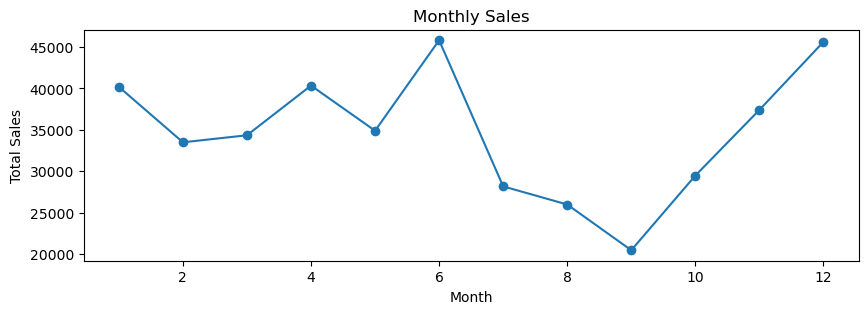

In [104]:
monthly_sales.plot(figsize = (10,3),kind= "line", marker = 'o')
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [105]:
df.to_csv("Clean_customer_data",index=False)